## 1. Bell - Round 1

Document code using comments, so we can all understand the code easily:

In [7]:
# Describe every piece of code with comments

### 1.1 Import dependencies for this notebook

In [8]:
import pandas as pd
import json

### 1.2 Analysis

In [9]:
# Store train set in pandas dataframe
train = pd.DataFrame.from_records(json.load(open('../../data/train.json')))
test = pd.DataFrame.from_records(json.load(open('../../data/test.json')))

# Print first 5 rows
train.head()

,ENTRYTYPE,title,editor,year,publisher,author,abstract
0,inproceedings,Philippine Language Resources: Trends and Dire...,None,2009,Association for Computational Linguistics,"[Roxas, Rachel Edita, Cheng, Charibeth, Lim, N...",None
1,inproceedings,A System for Translating Locative Prepositions...,None,1991,Association for Computational Linguistics,"[Japkowicz, Nathalie, Wiebe, Janyce M.]",None
2,inproceedings,Introduction to the Shared Task on Comparing S...,None,2008,College Publications,"[Bos, Johan]",None
3,inproceedings,Pynini: A Python library for weighted finite-s...,None,2016,Association for Computational Linguistics,"[Gorman, Kyle]",None
4,inproceedings,Improving Readability of Swedish Electronic He...,None,2014,Association for Computational Linguistics,"[Grigonyte, Gintarė, Kvist, Maria, Velupillai,...",None


In [10]:
#define the missing data 
missing_values_train = train.isnull().sum()
print(missing_values_train)
print("--------------------------------")
missing_values_test = test.isnull().sum()
print(missing_values_test)

ENTRYTYPE        0
title            0
editor       64438
year             0
publisher     8201
author        2399
abstract     33531
dtype: int64
--------------------------------
ENTRYTYPE        0
title            0
editor       21479
publisher     2813
author         831
abstract     11278
dtype: int64


In [19]:
print("Missing value percentages for the train set:")
missing_train_mean = train.isnull().mean()*100
print(round(missing_train_mean, 2))
print("--------------------------------")
print("Missing value percentages for the test set:")
missing_test_mean = test.isnull().mean()*100
print(round(missing_test_mean, 2))

Missing value percentages for the train set:
ENTRYTYPE     0.00
title         0.00
editor       97.76
year          0.00
publisher    12.44
author        3.64
abstract     50.87
dtype: float64
--------------------------------
Missing value percentages for the test set:
ENTRYTYPE     0.00
title         0.00
editor       97.76
publisher    12.80
author        3.78
abstract     51.33
dtype: float64


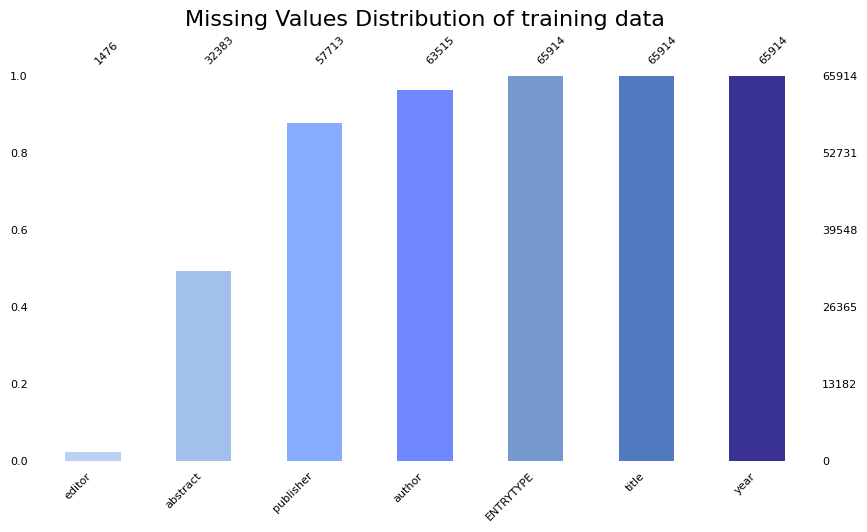

In [30]:

#for training data
import missingno as msno 
import matplotlib.pyplot as plt
color_palette = ['#bbd1f3', '#a3bfeb', '#87acff','#7088ff', "#7598cf","#5079bf", "#393292"]

# Customize the `msno.bar()` function to use the custom color palette
def custom_msno_bar(df):
    msno.bar(df, color=color_palette, sort="ascending", figsize=(10,5), fontsize=8)
    plt.title("Missing Values Distribution of training data", fontsize=16)

custom_msno_bar(train)
plt.show()    

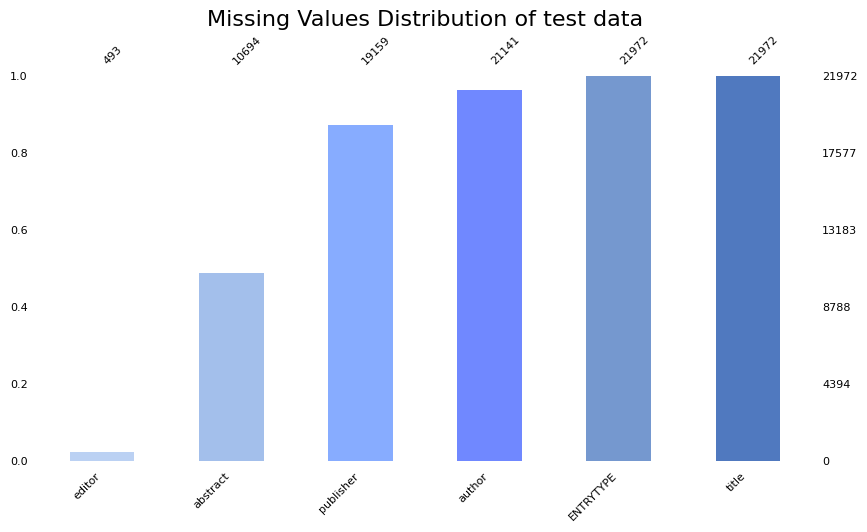

In [32]:
def custom_msno_bar_test(df):
    msno.bar(df, color=color_palette, sort="ascending", figsize=(10,5), fontsize=8)
    plt.title("Missing Values Distribution of test data", fontsize=16)

custom_msno_bar_test(test)
plt.show()

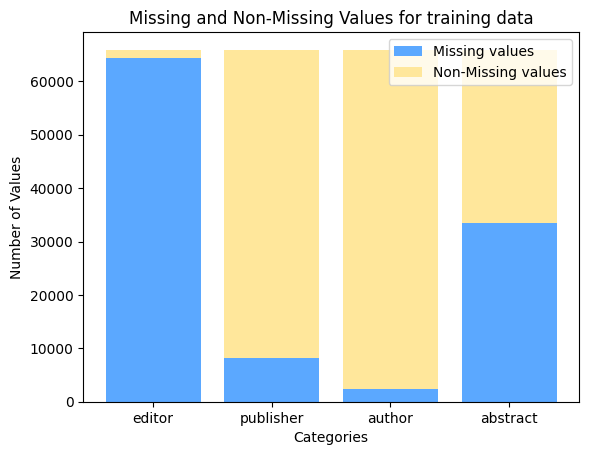

In [22]:
import matplotlib.pyplot as plt

#create categories to add each missing value column 
categories = ['editor', 'publisher', 'author', 'abstract']
missing_editor = train["editor"].isna().sum()
missing_publisher = train["publisher"].isna().sum()
missing_author = train["author"].isna().sum()
missing_abstract = train["abstract"].isna().sum()

# Count of non-missing values for each category
non_missing_editor = len(train) - missing_editor
non_missing_publisher = len(train) - missing_publisher
non_missing_author = len(train) - missing_author
non_missing_abstract = len(train) - missing_abstract

# Plotting the stacked bar chart
fig, ax = plt.subplots()

# Plotting the bars for missing values
ax.bar(categories, [missing_editor, missing_publisher, missing_author, missing_abstract], label='Missing values', color='#5ba8ff')

# Plotting the bars for non-missing values on top
ax.bar(categories, [non_missing_editor, non_missing_publisher, non_missing_author, non_missing_abstract], label='Non-Missing values', color='#ffe79b', bottom=[missing_editor, missing_publisher, missing_author, missing_abstract])

# Adding labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Number of Values')
ax.set_title('Missing and Non-Missing Values for training data')
ax.legend()

# Display the chart
plt.show()


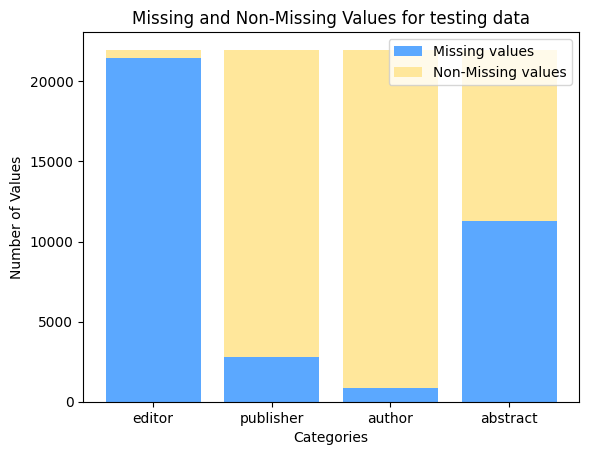

In [23]:
import matplotlib.pyplot as plt

#create categories to add each missing value column 
categories = ['editor', 'publisher', 'author', 'abstract']
missing_editor = test["editor"].isna().sum()
missing_publisher = test["publisher"].isna().sum()
missing_author = test["author"].isna().sum()
missing_abstract = test["abstract"].isna().sum()

# Count of non-missing values for each category
non_missing_editor = len(test) - missing_editor
non_missing_publisher = len(test) - missing_publisher
non_missing_author = len(test) - missing_author
non_missing_abstract = len(test) - missing_abstract

# Plotting the stacked bar chart
fig, ax = plt.subplots()

# Plotting the bars for missing values
ax.bar(categories, [missing_editor, missing_publisher, missing_author, missing_abstract], label='Missing values', color='#5ba8ff')

# Plotting the bars for non-missing values on top
ax.bar(categories, [non_missing_editor, non_missing_publisher, non_missing_author, non_missing_abstract], label='Non-Missing values', color='#ffe79b', bottom=[missing_editor, missing_publisher, missing_author, missing_abstract])

# Adding labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Number of Values')
ax.set_title('Missing and Non-Missing Values for testing data')
ax.legend()

# Display the chart
plt.show()


<Axes: >

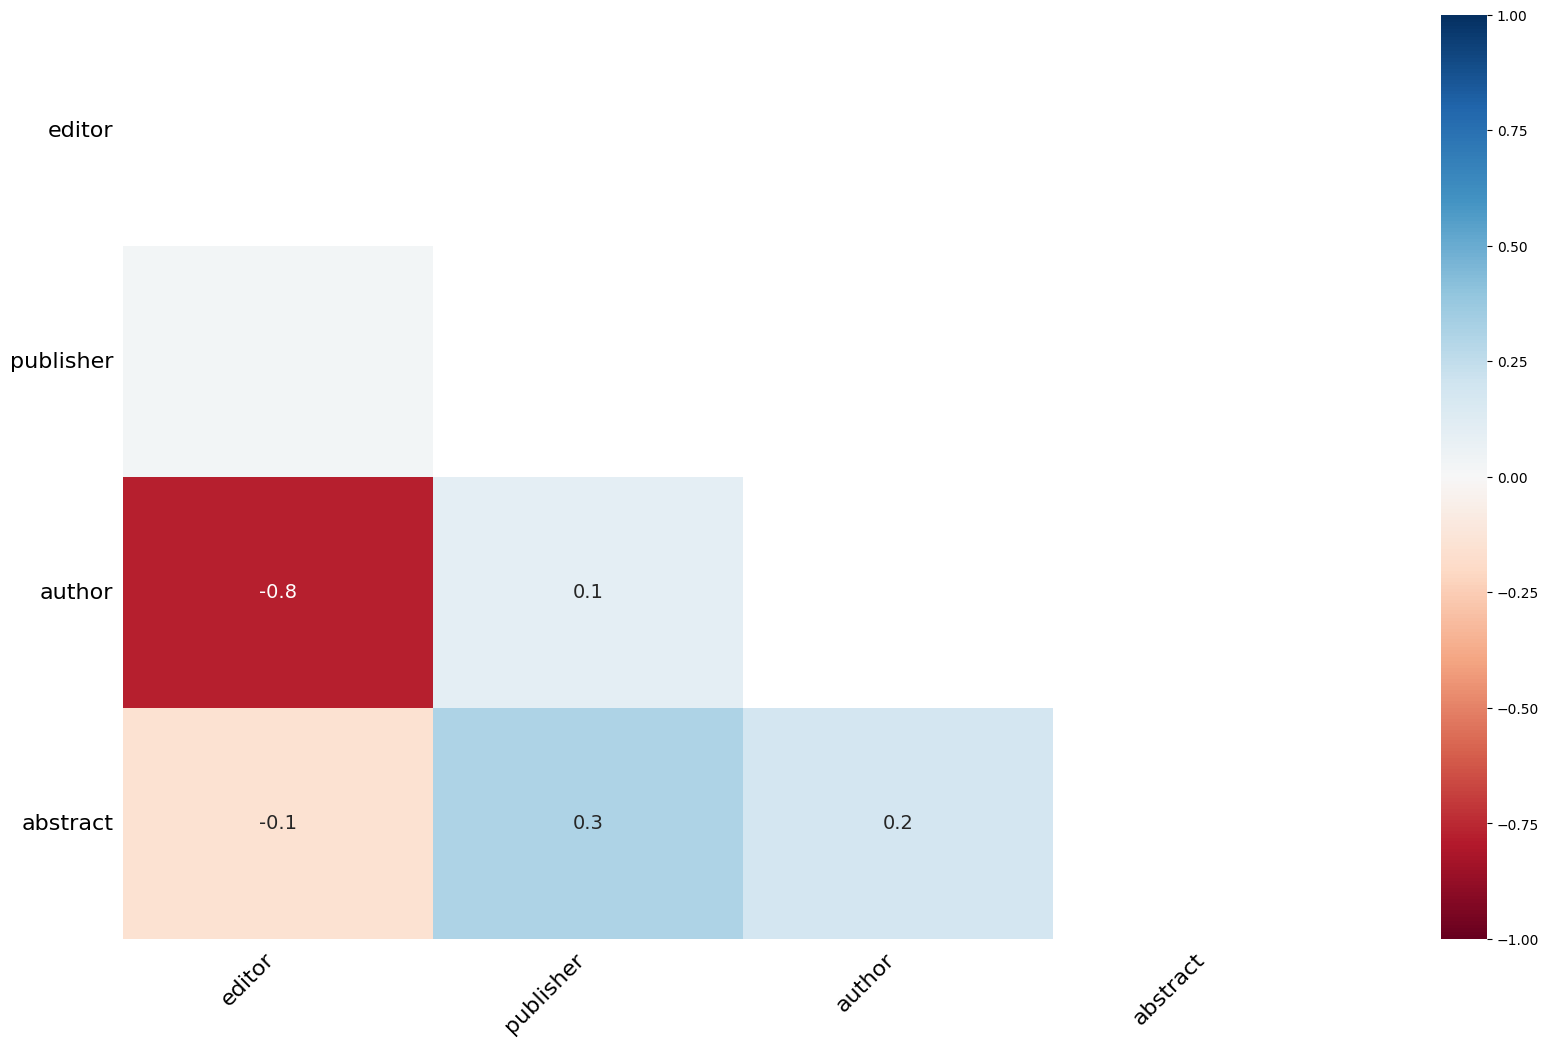

In [24]:
msno.heatmap(train)

<Axes: >

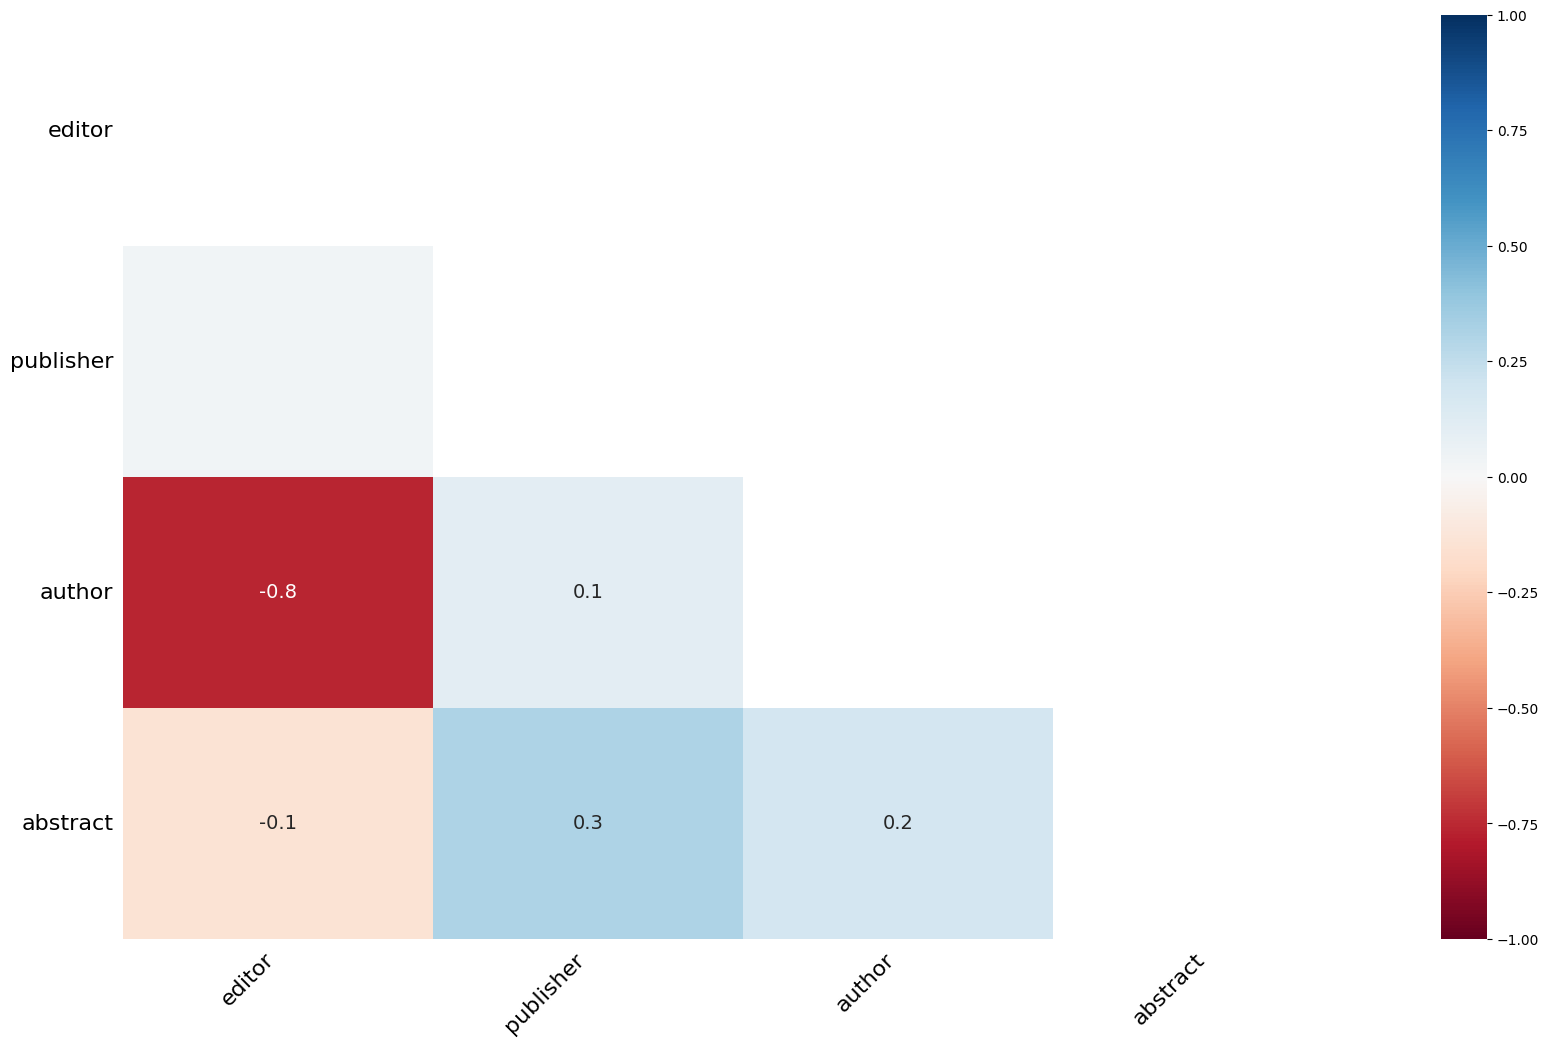

In [25]:
msno.heatmap(test)

<Axes: >

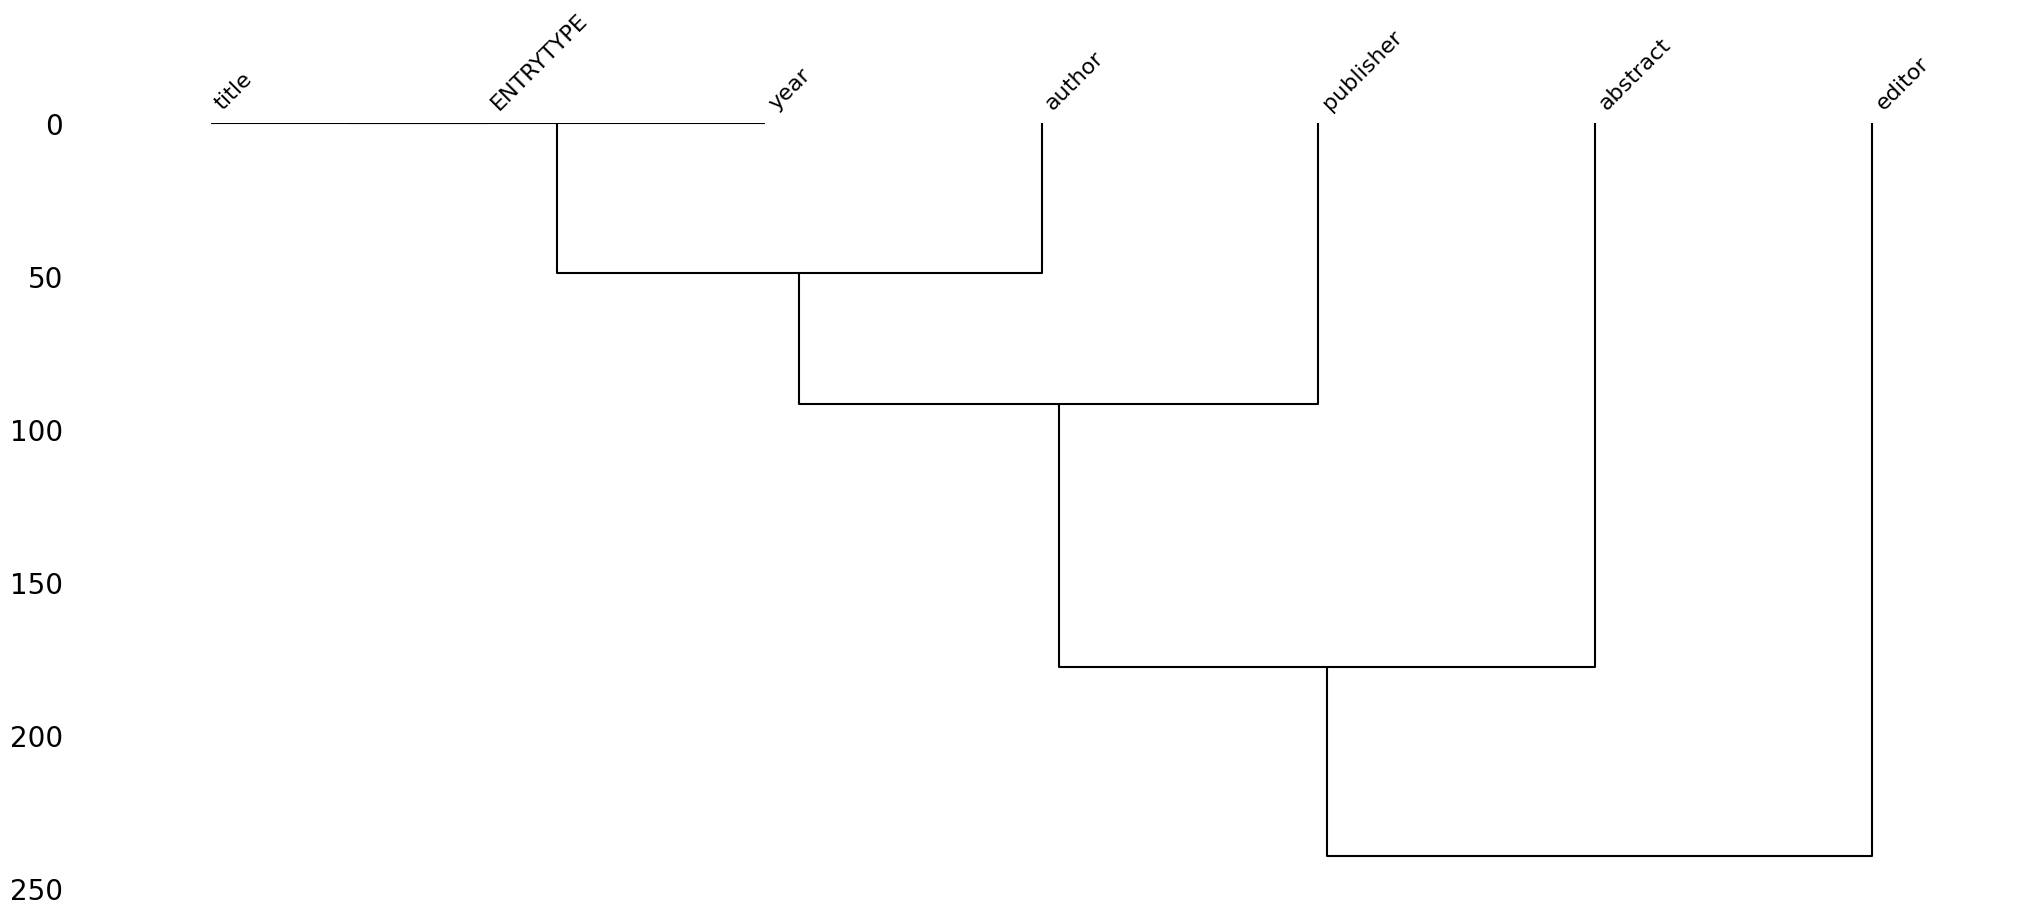

In [26]:
msno.dendrogram(train)

<Axes: >

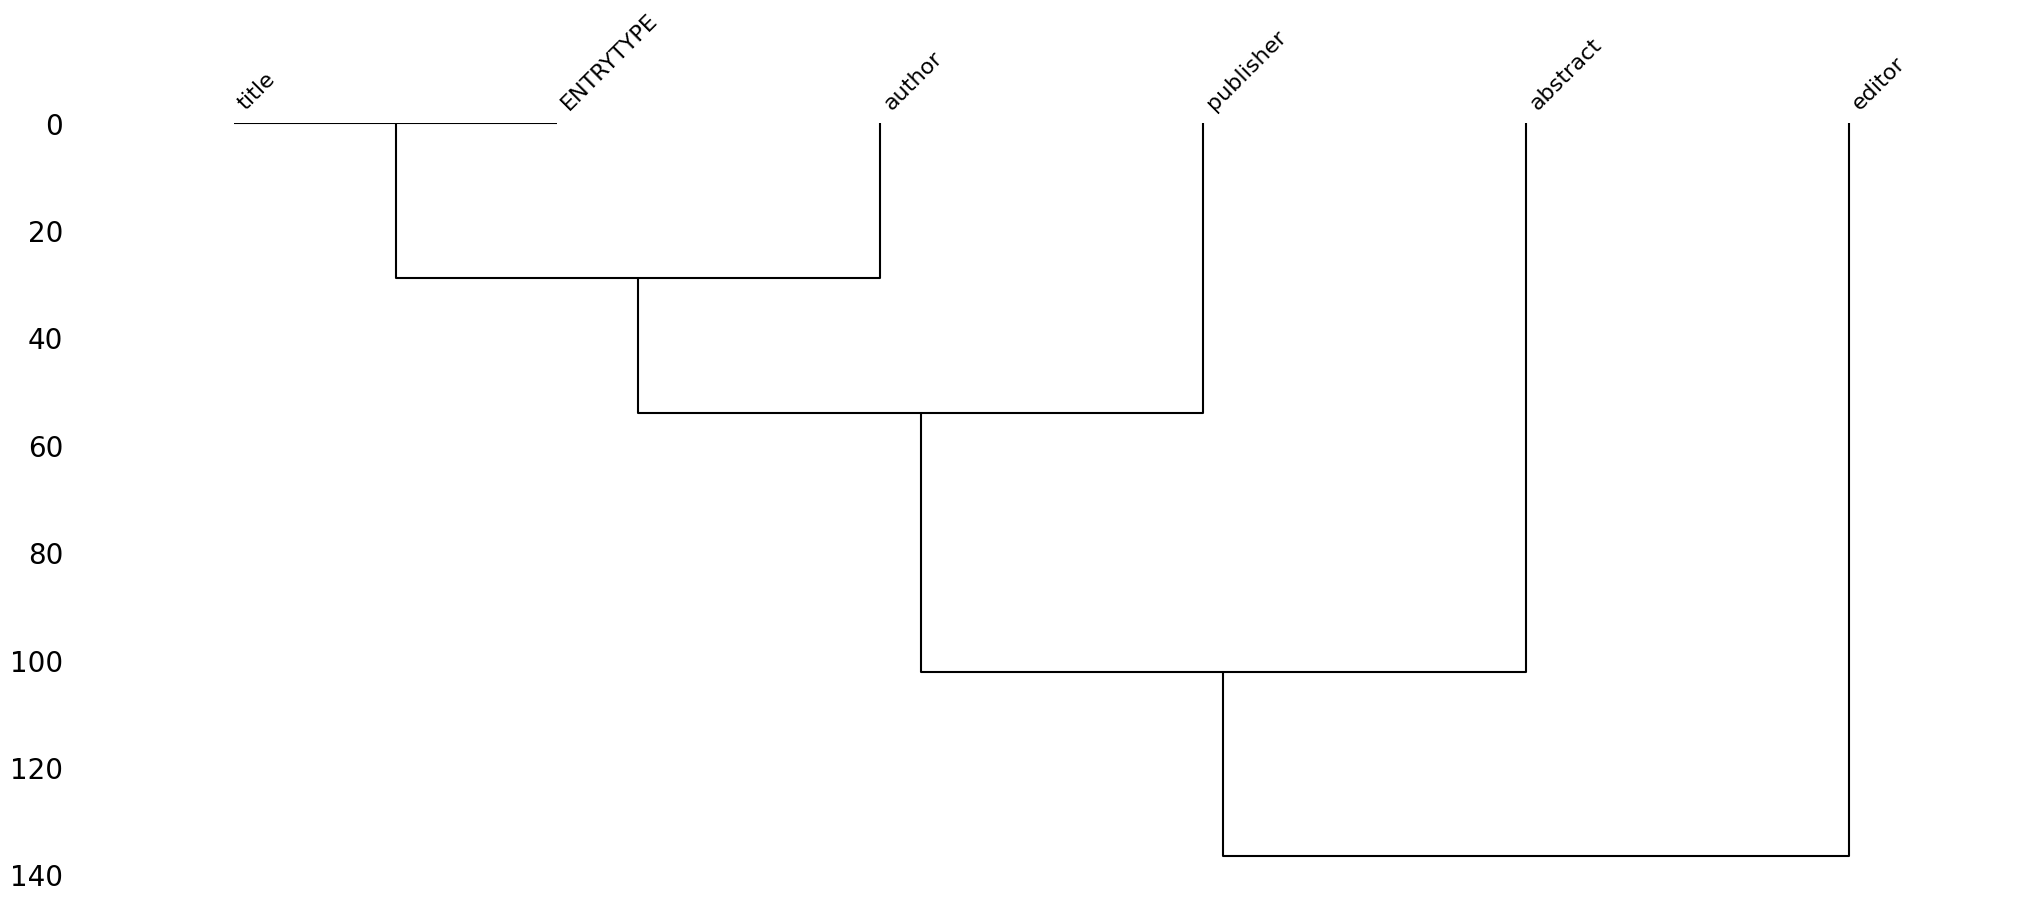

In [27]:
msno.dendrogram(test)

<Axes: >

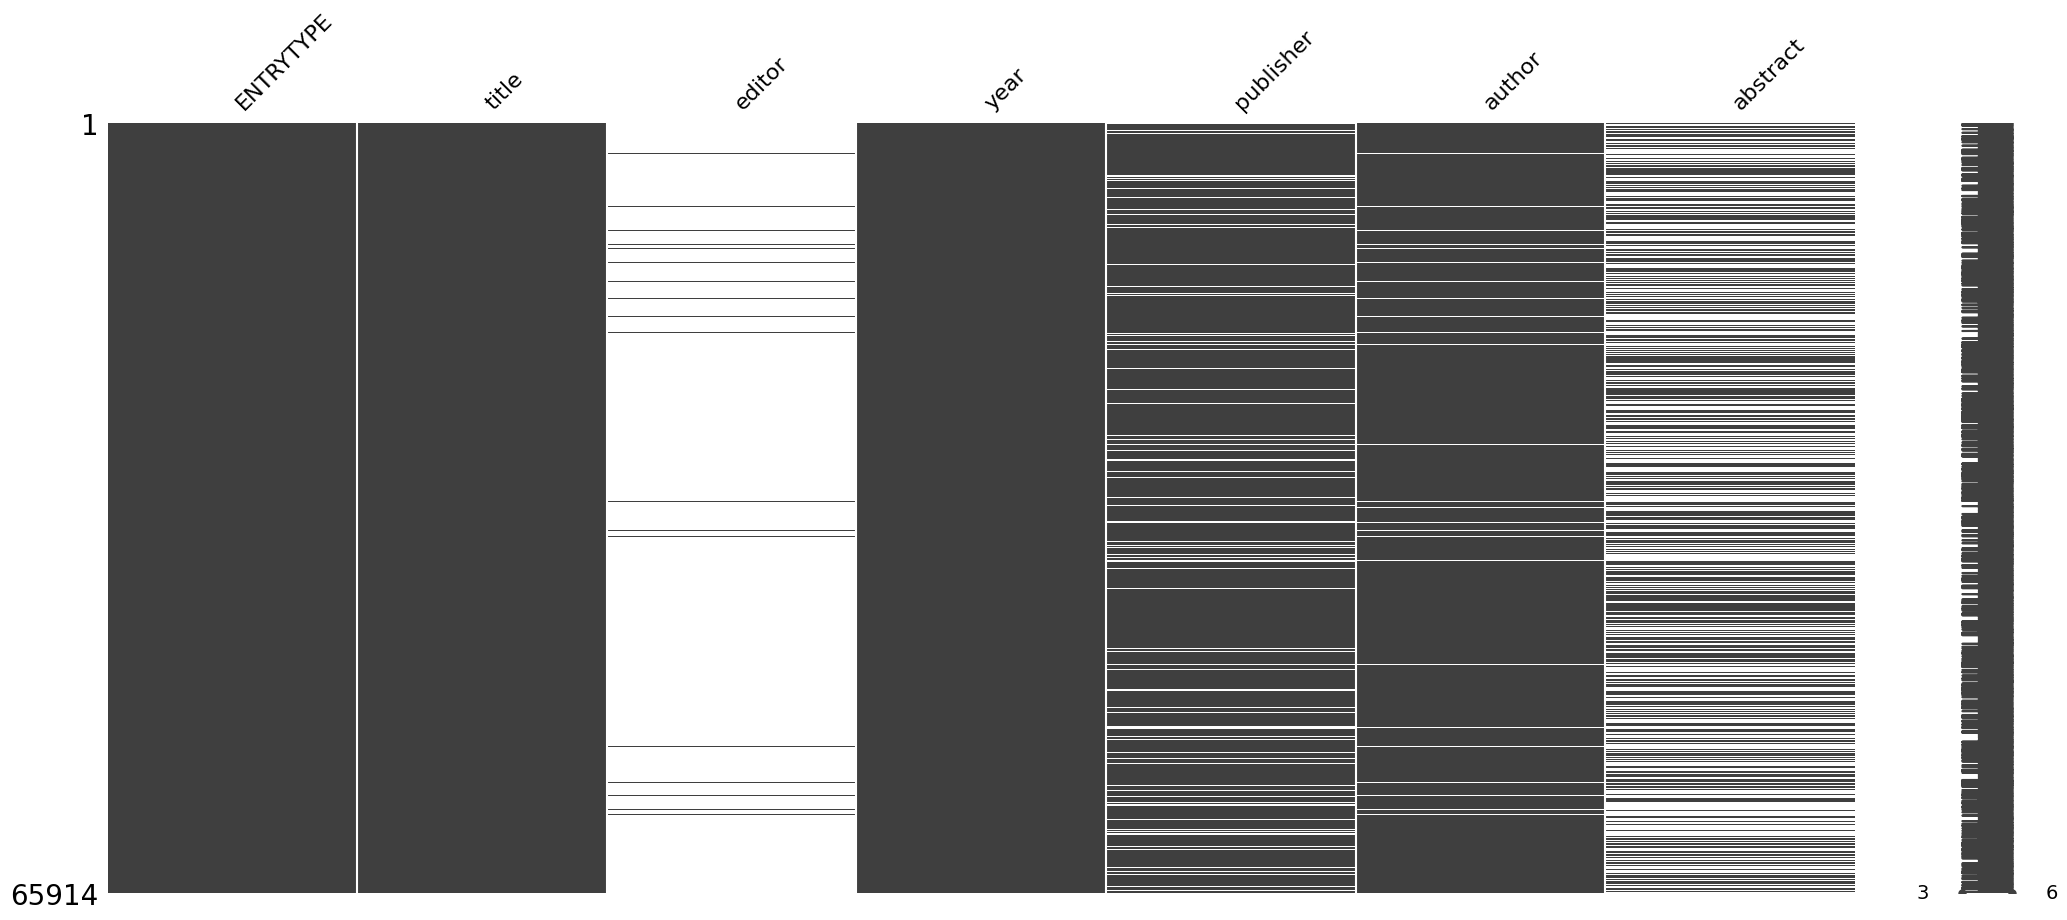

In [28]:
msno.matrix(train)

<Axes: >

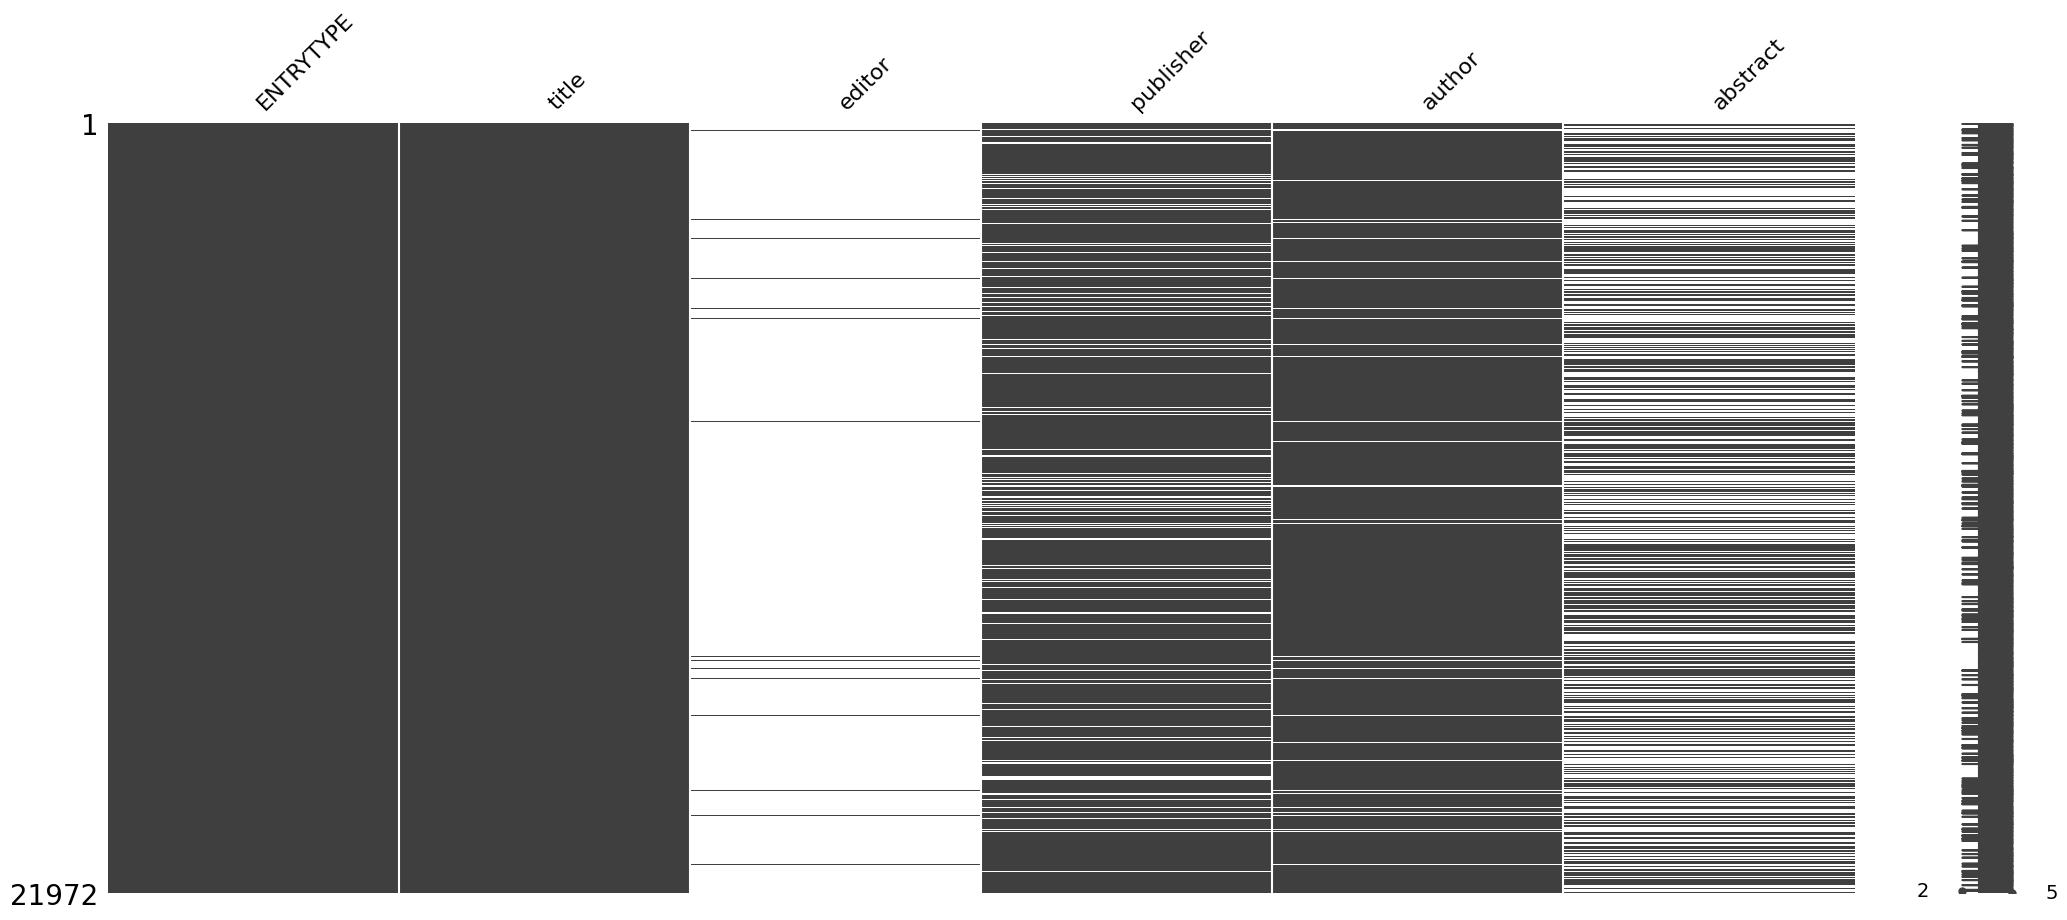

In [29]:
msno.matrix(test)